# Load Dataset

In [1]:
!pip install scikit-learn==1.4.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 46.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [4]:
import pandas as pd
df = pd.read_csv("Dataset.csv")
df.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
df.shape

(5574, 2)

In [6]:
df.isnull().sum()

,0
sms,0
label,0


# Basic Statistics

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sms     5574 non-null   object
 1   label   5574 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [8]:
df.describe()

,label
count,5574.000000
mean,0.134015
std,0.340699
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# Cleaning Text

In [17]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt_tab')
nltk.download('stopwords')

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove links
    text = re.sub(r'http\S+', '', text)

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]

    # Initialize Porter Stemmer
    stemmer = PorterStemmer()

    # Perform stemming
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Join the stemmed words back into a single string
    cleaned_text = ' '.join(stemmed_words)

    return cleaned_text

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
df['clean_text'] = df['sms'].apply(lambda x: clean_text(x))

In [19]:
df['label'].value_counts()

,count
label,
0,4827
1,747


In [20]:
df

,sms,label,clean_text
0,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...\n,0,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri wkli comp win fa cup final tkt st m...
3,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,nah dont think goe usf live around though
...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,nd time tri contact u u pound prize claim easi...
5570,Will ü b going to esplanade fr home?\n,0,b go esplanad fr home
5571,"Pity, * was in mood for that. So...any other s...",0,piti mood soani suggest
5572,The guy did some bitching but I acted like i'd...,0,guy bitch act like id interest buy someth els ...


# Balance Dataset

In [21]:
import pandas as pd
import numpy as np


# Separate majority and minority classes
df_majority = df[df['label'] == 0]
df_minority = df[df['label'] == 1]

# Oversample minority class
df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True, random_state=42)

# Combine the two classes
df_balanced = pd.concat([df_majority, df_minority_oversampled]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['label'].value_counts())  # Check if balanced


label
1    4827
0    4827
Name: count, dtype: int64


In [22]:
df_balanced

,sms,label,clean_text
0,Urgent Urgent! We have 800 FREE flights to Eur...,1,urgent urgent free flight europ give away call...
1,Wan2 win a Meet+Greet with Westlife 4 U or a m...,1,wan win meetgreet westlif u current tour unbre...
2,Dude ive been seeing a lotta corvettes lately\n,0,dude ive see lotta corvett late
3,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri wkli comp win fa cup final tkt st m...
4,You are a winner U have been specially selecte...,1,winner u special select receiv holiday flight ...
...,...,...,...
9649,WELL DONE! Your 4* Costa Del Sol Holiday or £5...,1,well done costa del sol holiday await collect ...
9650,"5 Free Top Polyphonic Tones call 087018728737,...",1,free top polyphon tone call nation rate get to...
9651,More people are dogging in your area now. Call...,1,peopl dog area call join like mind guy arrang ...
9652,Just buy a pizza. Meat lovers or supreme. U ge...,0,buy pizza meat lover suprem u get pick


# Train Models

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.83      0.91       161

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.97      1115



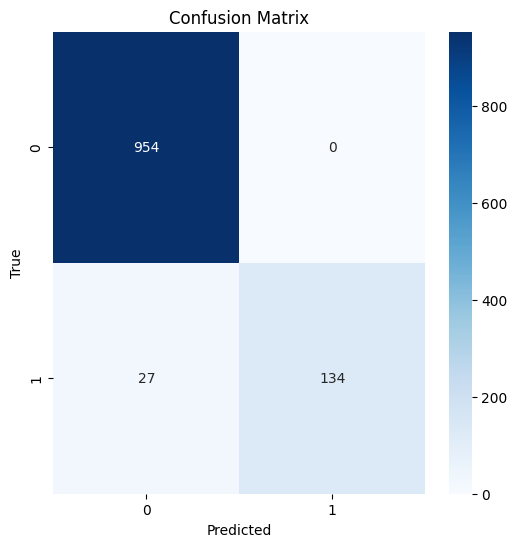

In [24]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Train RandomForest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_tfidf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# Save Model and TFIDF

In [25]:
import pickle
pickle.dump(rf_model, open("model.pkl",'wb'))
pickle.dump(tfidf_vectorizer,open("tfidf.pkl",'wb'))

# Detection System

In [28]:
def predict_fake_or_real(text):
    # Clean the input text
    cleaned_text = clean_text(text)

    # Transform the cleaned text using the TF-IDF vectorizer
    text_tfidf = tfidf_vectorizer.transform([cleaned_text])

    # Use the trained classifier to predict
    prediction = rf_model.predict(text_tfidf)

    # Map prediction to label
    label = "fake" if prediction[0] == 1 else "real"

    return label


In [29]:
# Example usage:
input_text = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.\n"

prediction = predict_fake_or_real(input_text)
print("Prediction:", prediction)

Prediction: real


In [30]:
# Example usage:
input_text = "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n"
prediction = predict_fake_or_real(input_text)
print("Prediction:", prediction)

Prediction: fake


In [31]:
# Example usage:
input_text = 'Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16'

prediction = predict_fake_or_real(input_text)
print("Prediction:", prediction)

Prediction: fake
